# ***SUPERCONDUCTIVITY DATA***

---







# **1.SVM METHOD**

*A:Data Loading and Feature Selection*

In [ ]:
import pandas as pd
import random

# Load the dataset
data = pd.read_csv('/content/train.csv')
print(data)

# Randomly select 10 features from your dataset
selected_features = random.sample(data.columns[:-1].tolist(), 10)  # Exclude the target variable

# Print the selected features
print("Selected Features:", selected_features)


       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
11633                   3         80.275193             56.555026   
11634                   2         96.479290             96.479290   
11635                   2         96.479290            124.635487   
11636                   3         49.594517             42.985706   
11637                   3         49.594517             37.844098   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795   
1              73.132787   

*B:Data Preprocessing*

In [ ]:
subset = data.iloc[:10000]

# Data Preprocessing
X = subset[selected_features]  # Features
y = subset['critical_temp']  # Target variable

# Impute missing values with the mean of each column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


*C:Visualization of Selected Features*

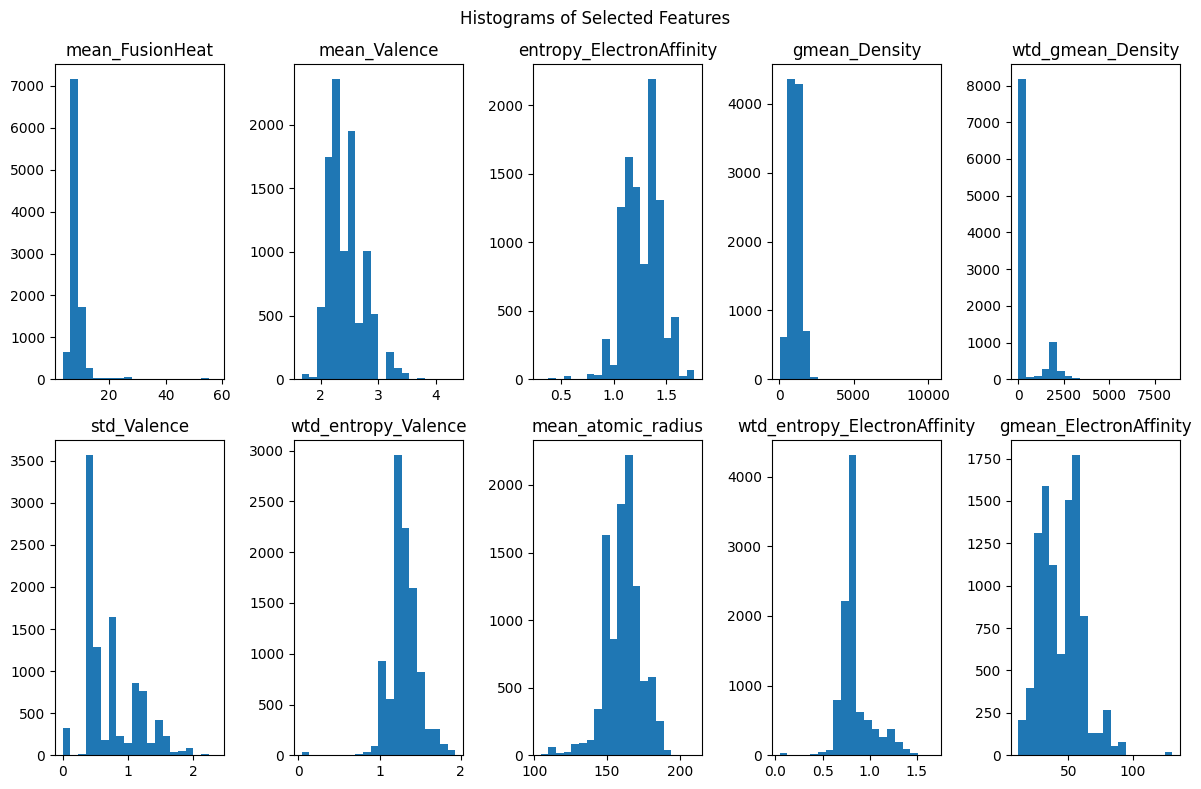

In [ ]:
import matplotlib.pyplot as plt

# Visualize the selected features as histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 5, i + 1)
    plt.hist(X[:, i], bins=20)
    plt.title(feature)
plt.suptitle("Histograms of Selected Features")
plt.tight_layout()
plt.show()


*D:Min-Max Scaling*

In [ ]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


*E:Splitting Data into Training and Testing Sets*

In [ ]:
# Split the scaled data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


*F:Model Training (Support Vector Machine)*

In [ ]:
# Initialize and train the Support Vector Machine (SVM) model
from sklearn.svm import SVR

svm_model = SVR(kernel='linear')  # You can choose different kernels (e.g., 'linear', 'rbf', 'poly', etc.)
svm_model.fit(X_train, y_train)


SVR(kernel='linear')

*G:Model Evaluation and Visualization*

Mean Squared Error (MSE): 743.5374654610544
Root Mean Squared Error (RMSE): 27.2678834063272
R-squared (R2): 0.24%


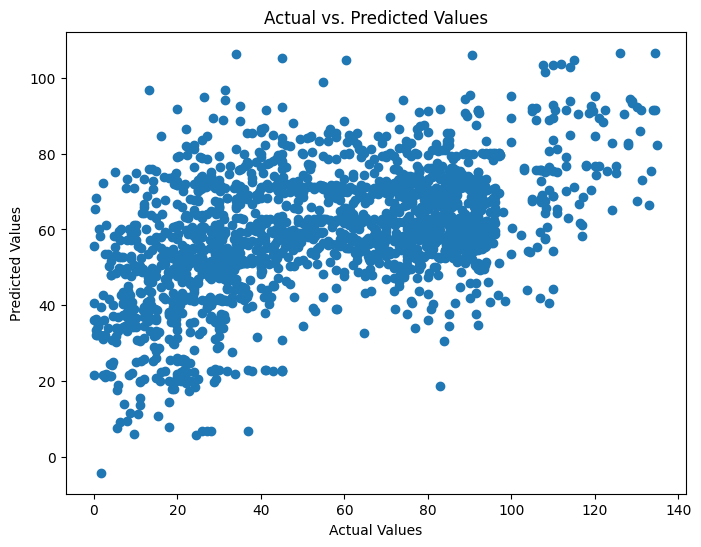

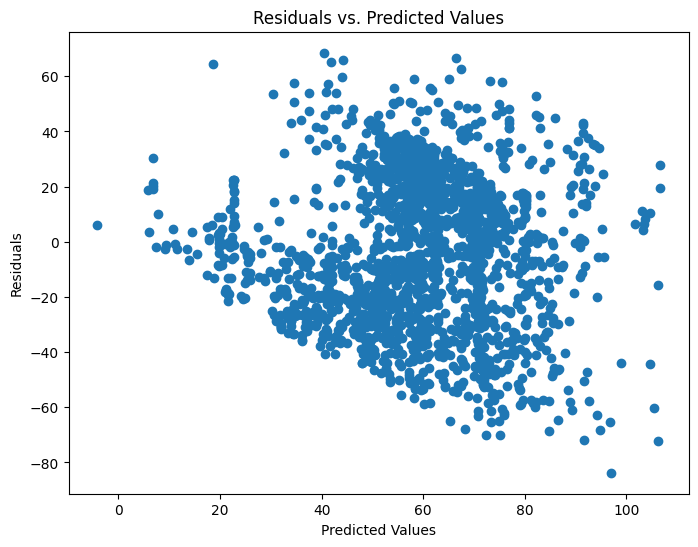

In [ ]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

svm_mse = mean_squared_error(y_test, y_pred)
rmse = svm_mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {svm_mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2:.2f}%")

# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


# **2.LINEAR REGRESSION**

*A.Data Loading and Feature Selection*

In [ ]:
import pandas as pd
import random

# Load the dataset
data = pd.read_csv('/content/train.csv')
print(data)

# Randomly select 10 features from your dataset
selected_features = random.sample(data.columns[:-1].tolist(), 10)  # Exclude the target variable

# Print the selected features
print("Selected Features:", selected_features)


       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                       4         88.944468             57.862692   
1                       5         92.729214             58.518416   
2                       4         88.944468             57.885242   
3                       4         88.944468             57.873967   
4                       4         88.944468             57.840143   
...                   ...               ...                   ...   
11633                   3         80.275193             56.555026   
11634                   2         96.479290             96.479290   
11635                   2         96.479290            124.635487   
11636                   3         49.594517             42.985706   
11637                   3         49.594517             37.844098   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0              66.361592              36.116612             1.181795   
1              73.132787   

*B.Data Preprocessing*

In [ ]:
  subset = data.iloc[:10000]

# Data Preprocessing
X = subset[selected_features]  # Features
y = subset['critical_temp']  # Target variable

# Impute missing values with the mean of each column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)


*C.Visualization of Selected Features*

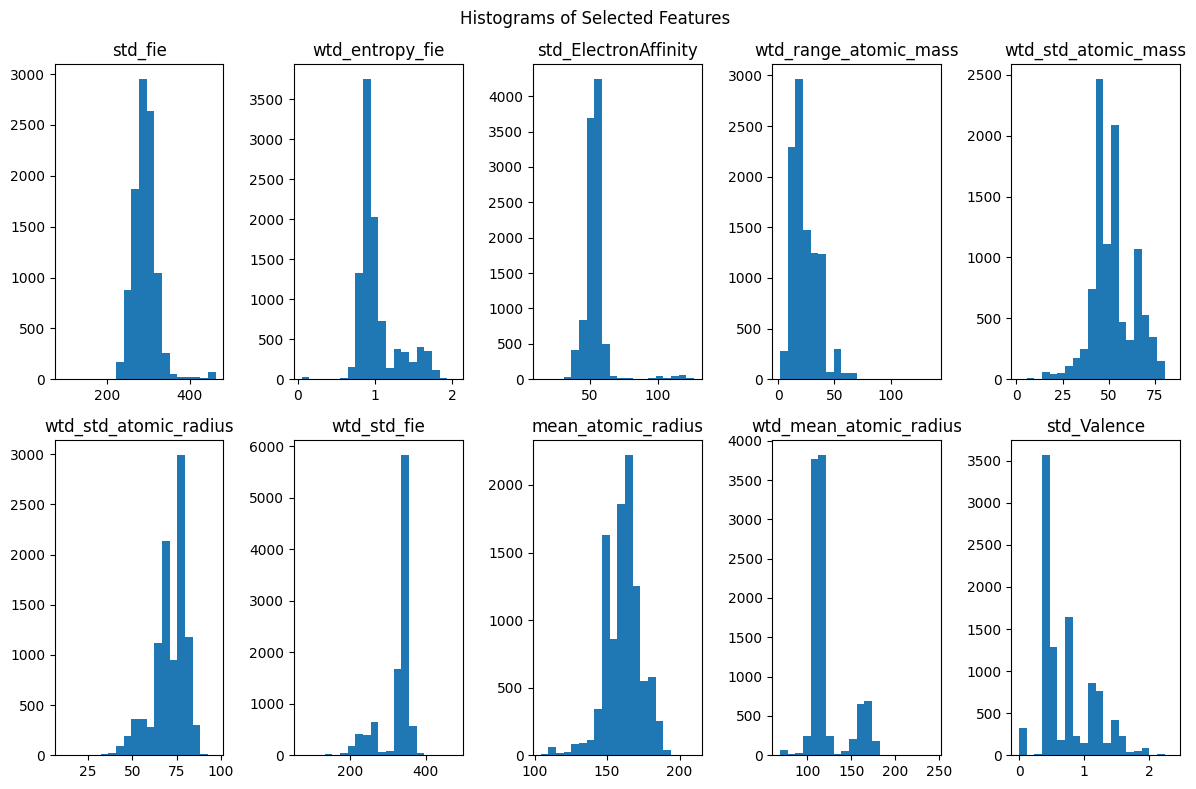

In [ ]:
import matplotlib.pyplot as plt

# Visualize the selected features as histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 5, i + 1)
    plt.hist(X[:, i], bins=20)
    plt.title(feature)
plt.suptitle("Histograms of Selected Features")
plt.tight_layout()
plt.show()


*D.Min-Max Scaling*

In [ ]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


*E.Data Splitting*

In [ ]:
# Split the scaled data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


*F.Model Training (Linear Regression)*

In [ ]:
# Initialize and train the Linear Regression model
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

*G.Model Evaluation and Metrics*

In [ ]:
# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Calculate evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

lr_mse = mean_squared_error(y_test, y_pred)
rmse =lr_mse**0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {lr_mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2:.2f}%")


Mean Squared Error (MSE): 650.3151174677951
Root Mean Squared Error (RMSE): 25.501276781129903
R-squared (R2): 0.34%


*H.Visualization of Results*

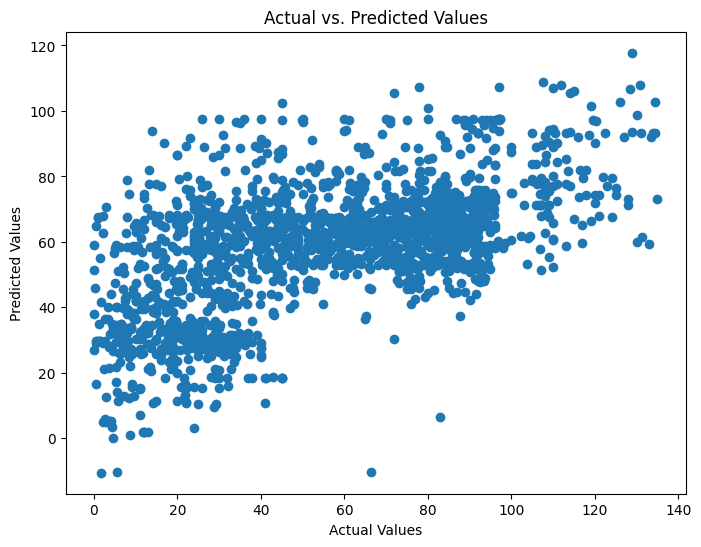

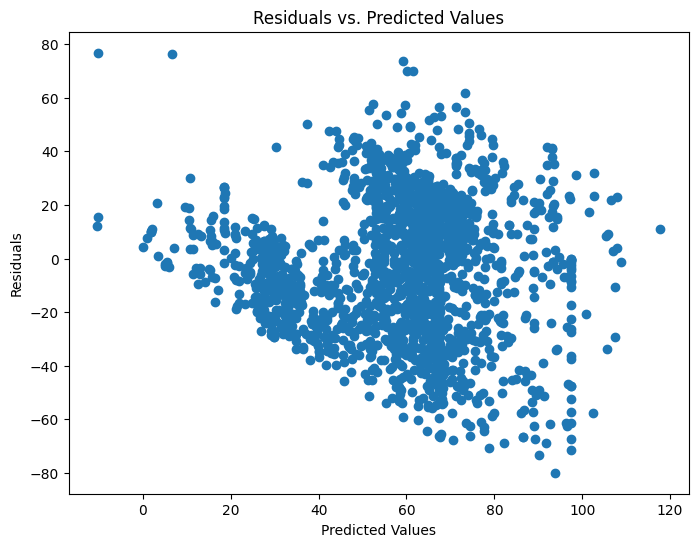

In [ ]:
# Plot actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


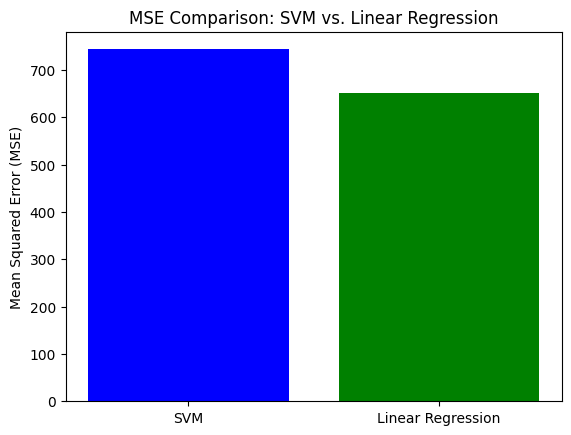

In [ ]:
import matplotlib.pyplot as plt
models = ['SVM', 'Linear Regression']
mse_values = [svm_mse, lr_mse]

plt.bar(models, mse_values, color=['blue', 'green'])
plt.title('MSE Comparison: SVM vs. Linear Regression')
plt.ylabel('Mean Squared Error (MSE)')

# Show the bar graph
plt.show()


# ***3.Ridge Regression with Bootstrap:***

In [2]:
import pandas as pd
import random
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/train.csv')

# Randomly select 10 features from your dataset
selected_features = random.sample(data.columns[:-1].tolist(), 10)  # Exclude the target variable

# Print the selected features
print("Selected Features:", selected_features)

subset = data.iloc[:10000]

# Data Preprocessing
X = subset[selected_features]  # Features
y = subset['critical_temp']  # Target variable

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Ridge Regression with Bootstrap
n_bootstraps = 100  # Number of bootstraps

ridge_rmse_list = []

for _ in range(n_bootstraps):
    X_resampled, y_resampled = resample(X_train, y_train, random_state=42)

    ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed
    ridge_model.fit(X_resampled, y_resampled)

    ridge_y_pred = ridge_model.predict(X_test)

    ridge_rmse = mean_squared_error(y_test, ridge_y_pred)**0.5
    ridge_rmse_list.append(ridge_rmse)

mean_ridge_rmse = np.mean(ridge_rmse_list)
std_ridge_rmse = np.std(ridge_rmse_list)

print("Ridge Regression with Bootstrap:")
print(f"Mean RMSE across bootstraps: {mean_ridge_rmse:.2f}")
print(f"Standard Error of RMSE: {std_ridge_rmse:.2f}")



Selected Features: ['wtd_mean_FusionHeat', 'wtd_std_fie', 'wtd_mean_atomic_mass', 'range_fie', 'gmean_ElectronAffinity', 'wtd_entropy_ThermalConductivity', 'wtd_gmean_ThermalConductivity', 'wtd_std_Density', 'number_of_elements', 'std_Valence']
Ridge Regression with Bootstrap:
Mean RMSE across bootstraps: 27.76
Standard Error of RMSE: 0.00


# ***4. Lasso Regression with Bootstrap:***

In [4]:
import pandas as pd
import random
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import Lasso  # Import Lasso from sklearn.linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/train.csv')

# Randomly select 10 features from your dataset
selected_features = random.sample(data.columns[:-1].tolist(), 10)  # Exclude the target variable

# Print the selected features
print("Selected Features:", selected_features)

subset = data.iloc[:10000]

# Data Preprocessing
X = subset[selected_features]  # Features
y = subset['critical_temp']  # Target variable

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Lasso Regression with Bootstrap
n_bootstraps = 100  # Number of bootstraps

lasso_rmse_list = []

for _ in range(n_bootstraps):
    X_resampled, y_resampled = resample(X_train, y_train, random_state=42)

    lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (regularization strength) as needed
    lasso_model.fit(X_resampled, y_resampled)

    lasso_y_pred = lasso_model.predict(X_test)

    lasso_rmse = mean_squared_error(y_test, lasso_y_pred)**0.5
    lasso_rmse_list.append(lasso_rmse)

mean_lasso_rmse = np.mean(lasso_rmse_list)
std_lasso_rmse = np.std(lasso_rmse_list)

print("Lasso Regression with Bootstrap:")
print(f"Mean RMSE across bootstraps: {mean_lasso_rmse:.2f}")
print(f"Standard Error of RMSE: {std_lasso_rmse:.2f}")


Selected Features: ['wtd_std_Valence', 'range_ElectronAffinity', 'range_ThermalConductivity', 'entropy_ElectronAffinity', 'wtd_std_fie', 'gmean_atomic_mass', 'entropy_Valence', 'gmean_Valence', 'mean_FusionHeat', 'wtd_std_atomic_radius']
Lasso Regression with Bootstrap:
Mean RMSE across bootstraps: 30.97
Standard Error of RMSE: 0.00


# ***5. K-Nearest Neighbors (KNN) Regression with Bootstrap:***

In [6]:
import pandas as pd
import random
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor  # Import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/train.csv')

# Randomly select 10 features from your dataset
selected_features = random.sample(data.columns[:-1].tolist(), 10)  # Exclude the target variable

# Print the selected features
print("Selected Features:", selected_features)

subset = data.iloc[:10000]

# Data Preprocessing
X = subset[selected_features]  # Features
y = subset['critical_temp']  # Target variable

# Impute missing values with the mean of each column
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)  # Corrected the missing dot here

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# K-Nearest Neighbors (KNN) Regression with Bootstrap
n_bootstraps = 100  # Number of bootstraps

knn_rmse_list = []

for _ in range(n_bootstraps):
    X_resampled, y_resampled = resample(X_train, y_train, random_state=42)

    knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (k) as needed
    knn_model.fit(X_resampled, y_resampled)

    knn_y_pred = knn_model.predict(X_test)

    knn_rmse = mean_squared_error(y_test, knn_y_pred)**0.5
    knn_rmse_list.append(knn_rmse)

mean_knn_rmse = np.mean(knn_rmse_list)
std_knn_rmse = np.std(knn_rmse_list)

print("K-Nearest Neighbors (KNN) Regression with Bootstrap:")
print(f"Mean RMSE across bootstraps: {mean_knn_rmse:.2f}")
print(f"Standard Error of RMSE: {std_knn_rmse:.2f}")


Selected Features: ['wtd_mean_ThermalConductivity', 'wtd_range_Density', 'wtd_range_atomic_mass', 'gmean_ThermalConductivity', 'entropy_ElectronAffinity', 'std_Density', 'wtd_gmean_ThermalConductivity', 'entropy_fie', 'mean_atomic_mass', 'std_fie']
K-Nearest Neighbors (KNN) Regression with Bootstrap:
Mean RMSE across bootstraps: 16.59
Standard Error of RMSE: 0.00
